<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Transformaciones Lineales </font> </center>

In [30]:
import pandas as pd

from sklearn.datasets import fetch_california_housing
ch=fetch_california_housing()
df=pd.DataFrame(ch.data,columns=ch.feature_names)
df['MedHouseVal']=ch.target
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Estandarización

Desplaza la media $\mu$ de $X$ a cero y escala la varianza $\sigma$ a uno
$$
X'=\frac{X-\mu}{\sigma},
$$
donde $X'$ es la variable transformada con media cero y varianza uno.

In [3]:
import numpy as np

In [5]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
df_est = zscore(df)

In [8]:
df_est

array([[ 2.34476576,  0.98214266,  0.62855945, ...,  1.05254828,
        -1.32783522,  2.12963148],
       [ 2.33223796, -0.60701891,  0.32704136, ...,  1.04318455,
        -1.32284391,  1.31415614],
       [ 1.7826994 ,  1.85618152,  1.15562047, ...,  1.03850269,
        -1.33282653,  1.25869341],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ...,  1.77823747,
        -0.8237132 , -0.99274649],
       [-1.05458292, -0.84539315, -0.04021111, ...,  1.77823747,
        -0.87362627, -1.05860847],
       [-0.78012947, -1.00430931, -0.07044252, ...,  1.75014627,
        -0.83369581, -1.01787803]])

In [10]:
pd.DataFrame(df_est, columns= df.columns)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


In [11]:
me = np.mean(df,axis=0)
ds = np.std(df)

In [12]:
me

MedInc            3.870671
HouseAge         28.639486
AveRooms          5.429000
AveBedrms         1.096675
Population     1425.476744
AveOccup          3.070655
Latitude         35.631861
Longitude      -119.569704
MedHouseVal       2.068558
dtype: float64

In [13]:
ds

MedInc            1.899776
HouseAge         12.585253
AveRooms          2.474113
AveBedrms         0.473899
Population     1132.434688
AveOccup         10.385798
Latitude          2.135901
Longitude         2.003483
MedHouseVal       1.153928
dtype: float64

In [15]:
esc_est = StandardScaler()
pd.DataFrame(esc_est.fit_transform(df), columns=df.columns)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


In [18]:
pd.DataFrame(esc_est.fit_transform(df), columns=df.columns).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,3.734255e-16,8.557001e-16,2.704111e-16,-1.531384e-16,-6.465442e-17,6.064808e-19,1.256263e-15,-6.527810e-15,1.466140e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00,-1.662641e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00,-7.561633e-01
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01,-2.353337e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01,5.014973e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00,2.540411e+00


In [20]:
# Medias originales
esc_est.mean_

array([ 3.87067100e+00,  2.86394864e+01,  5.42899974e+00,  1.09667515e+00,
        1.42547674e+03,  3.07065516e+00,  3.56318614e+01, -1.19569704e+02,
        2.06855817e+00])

In [21]:
# Desviaciones estandar originales
esc_est.scale_

array([1.89977569e+00, 1.25852527e+01, 2.47411320e+00, 4.73899376e-01,
       1.13243469e+03, 1.03857980e+01, 2.13590065e+00, 2.00348319e+00,
       1.15392820e+00])

# Escalamiento con base en la media

Desplaza la media $\mu$ de $X$ a cero y el rango a uno
$$
X'=\frac{X-\mu}{max(X)-min(X)}.
$$

In [22]:
me

MedInc            3.870671
HouseAge         28.639486
AveRooms          5.429000
AveBedrms         1.096675
Population     1425.476744
AveOccup          3.070655
Latitude         35.631861
Longitude      -119.569704
MedHouseVal       2.068558
dtype: float64

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

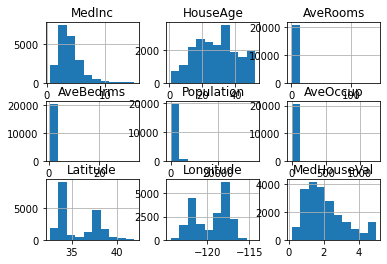

In [27]:
df.hist()

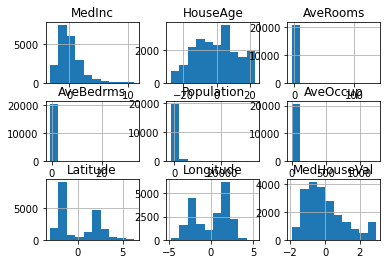

In [26]:
(df - me).hist();

In [28]:
rng = df.max() - df.min()


In [31]:
df_med = (df-me)/rng
df_med

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.307205,0.242363,0.011024,-0.002160,-0.030928,-0.000415,0.238910,-0.264970,0.506687
1,0.305563,-0.149794,0.005736,-0.003699,0.027342,-0.000773,0.236784,-0.263974,0.312667
2,0.233564,0.458049,0.020269,-0.000689,-0.026051,-0.000216,0.235721,-0.265966,0.299471
3,0.122235,0.458049,0.002753,-0.000700,-0.024313,-0.000421,0.235721,-0.266962,0.277203
4,-0.001688,0.458049,0.006046,-0.000462,-0.024117,-0.000716,0.235721,-0.266962,0.279059
...,...,...,...,...,...,...,...,...,...
20635,-0.159334,-0.071362,-0.002719,0.001087,-0.016269,-0.000410,0.408941,-0.151424,-0.265475
20636,-0.090611,-0.208617,0.004856,0.006495,-0.029975,0.000042,0.410004,-0.163376,-0.267537
20637,-0.149699,-0.228225,-0.001584,0.000694,-0.011729,-0.000600,0.403628,-0.164372,-0.236197
20638,-0.138169,-0.208617,-0.000705,0.002231,-0.019184,-0.000762,0.403628,-0.174332,-0.251867


In [32]:
df_med.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-3.298590e-15,-3.571849e-16,7.710607e-17,7.695104e-17,-4.344688e-19,-6.015759e-18,-1.749708e-14,-2.845357e-13,-7.411033e-15
std,1.310204e-01,2.467756e-01,1.753950e-02,1.404874e-02,3.174030e-02,8.358045e-03,2.269875e-01,1.995550e-01,2.379281e-01
min,-2.324638e-01,-5.419507e-01,-3.248795e-02,-2.262871e-02,-3.986874e-02,-1.913946e-03,-3.285719e-01,-4.761251e-01,-3.955794e-01
25%,-9.015538e-02,-2.086174e-01,-7.005976e-03,-2.685655e-03,-1.789503e-02,-5.157676e-04,-1.808567e-01,-2.221410e-01,-1.799082e-01
50%,-2.316320e-02,7.068893e-03,-1.416892e-03,-1.419802e-03,-7.272534e-03,-2.032280e-04,-1.457876e-01,1.075403e-01,-5.599114e-02
75%,6.017703e-02,1.639316e-01,4.419171e-03,8.451334e-05,8.394945e-03,1.702871e-04,2.208436e-01,1.553490e-01,1.193174e-01
max,7.675362e-01,4.580493e-01,9.675120e-01,9.773713e-01,9.601313e-01,9.980861e-01,6.714281e-01,5.238749e-01,6.044206e-01


# Escalamiento Robusto (Por cuantiles)
Desplaza la mediana $\bar{x}$ de $X$ a cero y el rango intercuartílico a uno
$$
X'=\frac{X-\bar{x}}{Q_3-Q_1},
$$
donde $Q_1$ y $Q_3$ son los cuartiles uno y tres respectivamente.

In [33]:
from sklearn.preprocessing import RobustScaler

In [34]:
mediana = df.median()
mediana

MedInc            3.534800
HouseAge         29.000000
AveRooms          5.229129
AveBedrms         1.048780
Population     1166.000000
AveOccup          2.818116
Latitude         34.260000
Longitude      -118.490000
MedHouseVal       1.797000
dtype: float64

In [37]:
Q = df.quantile((0.25,0.75))
iqr = Q.loc[0.75] - Q.loc[0.25]
iqr

MedInc           2.179850
HouseAge        19.000000
AveRooms         1.611665
AveBedrms        0.093447
Population     938.000000
AveOccup         0.852520
Latitude         3.780000
Longitude        3.790000
MedHouseVal      1.451250
dtype: float64

In [38]:
df_rob = (df - mediana)/iqr
df_rob

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.197582,0.631579,1.088935,-0.267221,-0.899787,-0.307981,0.957672,-0.986807,1.880448
1,2.186664,-0.421053,0.626066,-0.822926,1.316631,-0.830800,0.952381,-0.984169,1.232041
2,1.707732,1.210526,1.898042,0.263955,-0.714286,-0.018599,0.949735,-0.989446,1.187941
3,0.967177,1.210526,0.364978,0.259814,-0.648188,-0.316908,0.949735,-0.992084,1.113523
4,0.142854,1.210526,0.653191,0.345657,-0.640725,-0.746784,0.949735,-0.992084,1.119724
...,...,...,...,...,...,...,...,...,...
20635,-0.905796,-0.210526,-0.113966,0.904821,-0.342217,-0.302057,1.380952,-0.686016,-0.700086
20636,-0.448655,-0.578947,0.549064,2.857330,-0.863539,0.357401,1.383598,-0.717678,-0.706977
20637,-0.841709,-0.631579,-0.014635,0.763126,-0.169510,-0.577676,1.367725,-0.720317,-0.602239
20638,-0.765007,-0.578947,0.062286,1.317744,-0.453092,-0.815121,1.367725,-0.746702,-0.654608


In [39]:
df_rob.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.540799e-01,-0.018974,0.124015,0.512533,0.276628,0.296227,0.362926,-0.284882,0.187120
std,8.715378e-01,0.662398,1.535166,5.071439,1.207316,12.182767,0.565067,0.528636,0.795146
min,-1.392252e+00,-1.473684,-2.719533,-7.656179,-1.239872,-2.493559,-0.455026,-1.546174,-1.134891
25%,-4.456270e-01,-0.578947,-0.489191,-0.456959,-0.404051,-0.455561,-0.087302,-0.873351,-0.414126
50%,1.018608e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.543730e-01,0.421053,0.510809,0.543041,0.595949,0.544439,0.912698,0.126649,0.585874
max,5.259674e+00,1.210526,84.806698,353.332681,36.797441,1455.116059,2.034392,1.102902,2.207070


In [40]:
esc_rob = RobustScaler()
esc_rob.fit_transform(df)

array([[ 2.1975824 ,  0.63157895,  1.08893505, ...,  0.95767196,
        -0.98680739,  1.88044789],
       [ 2.18666422, -0.42105263,  0.62606588, ...,  0.95238095,
        -0.98416887,  1.23204134],
       [ 1.70773218,  1.21052632,  1.89804168, ...,  0.94973545,
        -0.98944591,  1.18794143],
       ...,
       [-0.84170929, -0.63157895, -0.0146346 , ...,  1.36772487,
        -0.72031662, -0.60223945],
       [-0.76500677, -0.57894737,  0.06228597, ...,  1.36772487,
        -0.74670185, -0.6546081 ],
       [-0.525816  , -0.68421053,  0.01587687, ...,  1.35185185,
        -0.72559367, -0.62222222]])

In [41]:
pd.DataFrame(esc_rob.fit_transform(df), columns=df.columns)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.197582,0.631579,1.088935,-0.267221,-0.899787,-0.307981,0.957672,-0.986807,1.880448
1,2.186664,-0.421053,0.626066,-0.822926,1.316631,-0.830800,0.952381,-0.984169,1.232041
2,1.707732,1.210526,1.898042,0.263955,-0.714286,-0.018599,0.949735,-0.989446,1.187941
3,0.967177,1.210526,0.364978,0.259814,-0.648188,-0.316908,0.949735,-0.992084,1.113523
4,0.142854,1.210526,0.653191,0.345657,-0.640725,-0.746784,0.949735,-0.992084,1.119724
...,...,...,...,...,...,...,...,...,...
20635,-0.905796,-0.210526,-0.113966,0.904821,-0.342217,-0.302057,1.380952,-0.686016,-0.700086
20636,-0.448655,-0.578947,0.549064,2.857330,-0.863539,0.357401,1.383598,-0.717678,-0.706977
20637,-0.841709,-0.631579,-0.014635,0.763126,-0.169510,-0.577676,1.367725,-0.720317,-0.602239
20638,-0.765007,-0.578947,0.062286,1.317744,-0.453092,-0.815121,1.367725,-0.746702,-0.654608


In [42]:
pd.DataFrame(esc_rob.fit_transform(df), columns=df.columns).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.540799e-01,-0.018974,0.124015,0.512533,0.276628,0.296227,0.362926,-0.284882,0.187120
std,8.715378e-01,0.662398,1.535166,5.071439,1.207316,12.182767,0.565067,0.528636,0.795146
min,-1.392252e+00,-1.473684,-2.719533,-7.656179,-1.239872,-2.493559,-0.455026,-1.546174,-1.134891
25%,-4.456270e-01,-0.578947,-0.489191,-0.456959,-0.404051,-0.455561,-0.087302,-0.873351,-0.414126
50%,1.018608e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.543730e-01,0.421053,0.510809,0.543041,0.595949,0.544439,0.912698,0.126649,0.585874
max,5.259674e+00,1.210526,84.806698,353.332681,36.797441,1455.116059,2.034392,1.102902,2.207070


In [43]:
# Mediana de las variables originales
esc_rob.center_

array([ 3.53480000e+00,  2.90000000e+01,  5.22912879e+00,  1.04878049e+00,
        1.16600000e+03,  2.81811565e+00,  3.42600000e+01, -1.18490000e+02,
        1.79700000e+00])

In [47]:
mediana

MedInc            3.534800
HouseAge         29.000000
AveRooms          5.229129
AveBedrms         1.048780
Population     1166.000000
AveOccup          2.818116
Latitude         34.260000
Longitude      -118.490000
MedHouseVal       1.797000
dtype: float64

In [45]:
 # IQR de las variables originales
esc_rob.scale_

array([2.17985000e+00, 1.90000000e+01, 1.61166472e+00, 9.34470203e-02,
       9.38000000e+02, 8.52519777e-01, 3.78000000e+00, 3.79000000e+00,
       1.45125000e+00])

In [46]:
iqr

MedInc           2.179850
HouseAge        19.000000
AveRooms         1.611665
AveBedrms        0.093447
Population     938.000000
AveOccup         0.852520
Latitude         3.780000
Longitude        3.790000
MedHouseVal      1.451250
dtype: float64

# Normalización de mínimo y máximo
Queremos que nuestros datos esten entre (0,1).
$$
X'=\frac{X-\min{X}}{\max{X}-\min{X}}.
$$

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
m = df.min()
M = df.max()
df_minMax = (df - m)/(M-m)
df_minMax

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638
...,...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701,0.130105
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749,0.128043
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753,0.159383
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793,0.143713


In [50]:
df_minMax.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125,0.395579
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555,0.237928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984,0.215671
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665,0.339588
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474,0.514897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
A,B = 5,10
df_AB = A + (B-A)*(df-m)/(M-m)
df_AB.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,6.162319,7.709754,5.162440,5.113144,5.199344,5.009570,6.642859,7.380625,6.977897
std,0.655102,1.233878,0.087697,0.070244,0.158701,0.041790,1.134938,0.997775,1.189641
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,5.711542,6.666667,5.127410,5.099715,5.109869,5.006991,5.738576,6.269920,6.078356
50%,6.046503,7.745098,5.155355,5.106045,5.162981,5.008554,5.913921,7.918327,6.697941
75%,6.463204,8.529412,5.184536,5.113566,5.241318,5.010421,7.747078,8.157371,7.574484
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [53]:
esc_minMax = MinMaxScaler((A,B))
esc_minMax

MinMaxScaler(feature_range=(5, 10))

In [55]:
pd.DataFrame(esc_minMax.fit_transform(df),columns=df.columns)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,7.698342,8.921569,5.217562,5.102343,5.044704,5.007497,7.837407,6.055777,9.511332
1,7.690135,6.960784,5.191120,5.094646,5.336052,5.005704,7.826780,6.060757,8.541233
2,7.330140,10.000000,5.263782,5.109701,5.069088,5.008490,7.821467,6.050797,8.475254
3,6.773493,10.000000,5.176205,5.109643,5.077777,5.007467,7.821467,6.045817,8.363914
4,6.153881,10.000000,5.192669,5.110832,5.078758,5.005992,7.821467,6.045817,8.373192
...,...,...,...,...,...,...,...,...,...
20635,5.365650,7.352941,5.148845,5.118577,5.117997,5.007517,8.687566,6.623506,5.650523
20636,5.709266,6.666667,5.186721,5.145621,5.049469,5.009780,8.692880,6.563745,5.640214
20637,5.413822,6.568627,5.154519,5.116614,5.140699,5.006572,8.660999,6.558765,5.796914
20638,5.471476,6.666667,5.158913,5.124296,5.103422,5.005758,8.660999,6.508964,5.718564


In [56]:
pd.DataFrame(esc_minMax.fit_transform(df),columns=df.columns).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,6.162319,7.709754,5.162440,5.113144,5.199344,5.009570,6.642859,7.380625,6.977897
std,0.655102,1.233878,0.087697,0.070244,0.158701,0.041790,1.134938,0.997775,1.189641
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,5.711542,6.666667,5.127410,5.099715,5.109869,5.006991,5.738576,6.269920,6.078356
50%,6.046503,7.745098,5.155355,5.106045,5.162981,5.008554,5.913921,7.918327,6.697941
75%,6.463204,8.529412,5.184536,5.113566,5.241318,5.010421,7.747078,8.157371,7.574484
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [57]:
# Mínimo de las variables originales
esc_minMax.min_

array([  4.82762307,   4.90196078,   4.97000793,   4.95059289,
         4.99957958,   4.99721437, -12.2901169 ,  66.92729084,
         4.84537177])

In [60]:
 # Rango de las variables originales
esc_minMax.scale_

array([3.44822830e-01, 9.80392157e-02, 3.54451715e-02, 1.48221344e-01,
       1.40138457e-04, 4.02368817e-03, 5.31349628e-01, 4.98007968e-01,
       1.03092358e+00])

# Escalamiento de máximo absoluto
$$
X'=\frac{X}{\max{|X|}}.
$$

Se recomienda para datos centrados en cero o para variables con pocas observaciones.

In [61]:
from sklearn.preprocessing import MaxAbsScaler

In [62]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [63]:
df_max = df/(np.max(np.abs(df), axis=0))
df_max

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.555010,0.788462,0.049216,0.030053,0.009024,0.002055,0.902980,-0.982951,0.905198
1,0.553423,0.403846,0.043959,0.028529,0.067289,0.001697,0.902503,-0.982871,0.716999
2,0.483823,1.000000,0.058405,0.031510,0.013901,0.002254,0.902265,-0.983032,0.704199
3,0.376204,1.000000,0.040994,0.031499,0.015638,0.002049,0.902265,-0.983112,0.682599
4,0.256412,1.000000,0.044267,0.031734,0.015834,0.001755,0.902265,-0.983112,0.684399
...,...,...,...,...,...,...,...,...,...
20635,0.104019,0.480769,0.035554,0.033268,0.023681,0.002059,0.941120,-0.973784,0.156200
20636,0.170452,0.346154,0.043084,0.038624,0.009977,0.002512,0.941359,-0.974749,0.154200
20637,0.113333,0.326923,0.036682,0.032879,0.028222,0.001870,0.939928,-0.974829,0.184600
20638,0.124479,0.346154,0.037556,0.034401,0.020767,0.001708,0.939928,-0.975633,0.169400


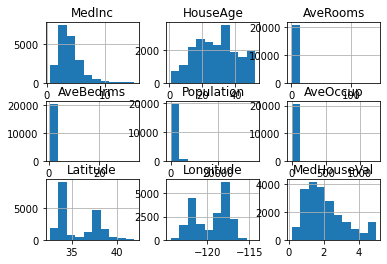

In [65]:
# Escalamiento sobre la variable centrada
#
df.hist();

In [66]:
df_centrada = df -me
df_centrada

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.454529,12.360514,1.555127,-0.072866,-1103.476744,-0.515100,2.248139,-2.660296,2.457442
1,4.430729,-7.639486,0.809137,-0.124795,975.523256,-0.960813,2.228139,-2.650296,1.516442
2,3.386729,23.360514,2.859136,-0.023229,-929.476744,-0.268395,2.218139,-2.670296,1.452442
3,1.772429,23.360514,0.388352,-0.023616,-867.476744,-0.522710,2.218139,-2.680296,1.344442
4,-0.024471,23.360514,0.852854,-0.015594,-860.476744,-0.889188,2.218139,-2.680296,1.353442
...,...,...,...,...,...,...,...,...,...
20635,-2.310371,-3.639486,-0.383545,0.036658,-580.476744,-0.510049,3.848139,-1.520296,-1.287558
20636,-1.313871,-10.639486,0.685035,0.219114,-1069.476744,0.052152,3.858139,-1.640296,-1.297558
20637,-2.170671,-11.639486,-0.223457,0.023417,-418.476744,-0.745020,3.798139,-1.650296,-1.145558
20638,-2.003471,-10.639486,-0.099487,0.075245,-684.476744,-0.947446,3.798139,-1.750296,-1.221558


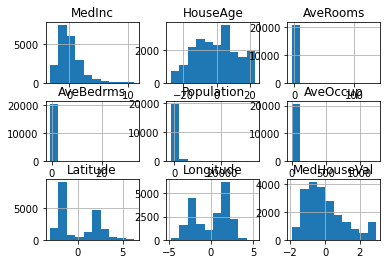

In [67]:
df_centrada.hist();

In [68]:
df_maxCentrada= df_centrada/np.max(np.abs(df_centrada),axis=0)
df_maxCentrada

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.400248,0.447205,0.011395,-0.002210,-0.032212,-0.000415,0.355823,-0.505788,0.838302
1,0.398109,-0.276398,0.005929,-0.003785,0.028477,-0.000775,0.352657,-0.503887,0.517301
2,0.304304,0.845186,0.020949,-0.000705,-0.027133,-0.000216,0.351075,-0.507689,0.495468
3,0.159256,0.845186,0.002845,-0.000716,-0.025323,-0.000421,0.351075,-0.509591,0.458627
4,-0.002199,0.845186,0.006249,-0.000473,-0.025119,-0.000717,0.351075,-0.509591,0.461697
...,...,...,...,...,...,...,...,...,...
20635,-0.207591,-0.131677,-0.002810,0.001112,-0.016945,-0.000411,0.609062,-0.289046,-0.439222
20636,-0.118054,-0.384938,0.005019,0.006646,-0.031220,0.000042,0.610645,-0.311861,-0.442633
20637,-0.195039,-0.421118,-0.001637,0.000710,-0.012216,-0.000601,0.601148,-0.313762,-0.390782
20638,-0.180016,-0.384938,-0.000729,0.002282,-0.019981,-0.000764,0.601148,-0.332775,-0.416708


In [69]:
df_maxCentrada.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-4.341942e-15,-1.418587e-15,7.517030e-17,8.082794e-17,3.649906e-18,-5.874613e-18,-2.652722e-14,-5.443547e-13,-1.251600e-14
std,1.707025e-01,4.553470e-01,1.812845e-02,1.437401e-02,3.305829e-02,8.374072e-03,3.380667e-01,3.809210e-01,3.936466e-01
min,-3.028701e-01,-1.000000e+00,-3.357886e-02,-2.315262e-02,-4.152426e-02,-1.917616e-03,-4.893627e-01,-9.088525e-01,-6.544771e-01
25%,-1.174607e-01,-3.849379e-01,-7.241228e-03,-2.747835e-03,-1.863811e-02,-5.167567e-04,-2.693612e-01,-4.240344e-01,-2.976539e-01
50%,-3.017864e-02,1.304342e-02,-1.464470e-03,-1.452674e-03,-7.574521e-03,-2.036178e-04,-2.171306e-01,2.052785e-01,-9.263607e-02
75%,7.840285e-02,3.024844e-01,4.567562e-03,8.647005e-05,8.743539e-03,1.706137e-04,3.289163e-01,2.965384e-01,1.974079e-01
max,1.000000e+00,8.451862e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [70]:
esc_maxAbs = MaxAbsScaler()
pd.DataFrame(esc_maxAbs.fit_transform(df), columns=df.columns).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.258043,0.550759,0.038257,0.032192,0.039949,0.002470,0.849389,-0.961558,0.413711
std,0.126654,0.242030,0.017435,0.013911,0.031738,0.008353,0.050917,0.016112,0.230791
min,0.033326,0.019231,0.005963,0.009785,0.000084,0.000557,0.775685,-1.000000,0.029998
25%,0.170892,0.346154,0.031293,0.029533,0.022056,0.001954,0.808820,-0.979493,0.239200
50%,0.235652,0.557692,0.036848,0.030786,0.032678,0.002267,0.816687,-0.952875,0.359399
75%,0.316215,0.711538,0.042650,0.032276,0.048344,0.002640,0.898927,-0.949015,0.529449
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.919260,1.000000


In [71]:
esc_maxAbs.max_abs_

array([1.50001000e+01, 5.20000000e+01, 1.41909091e+02, 3.40666667e+01,
       3.56820000e+04, 1.24333333e+03, 4.19500000e+01, 1.24350000e+02,
       5.00001000e+00])

In [72]:
esc_maxAbs.scale_

array([1.50001000e+01, 5.20000000e+01, 1.41909091e+02, 3.40666667e+01,
       3.56820000e+04, 1.24333333e+03, 4.19500000e+01, 1.24350000e+02,
       5.00001000e+00])

# Regresión

In [73]:
from scipy.stats import yeojohnson
from sklearn.linear_model import LinearRegression

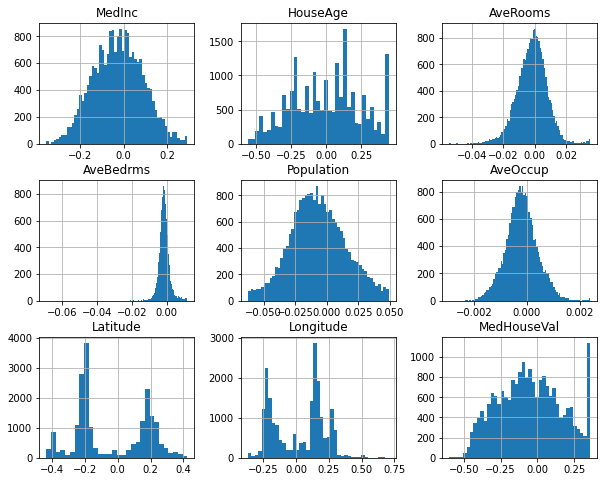

In [74]:
# Antes de hacer la separación de datos entre train y test, necesitamos hacer la transformación de potencia
#
df_t=df.copy()
lmb={}
for var in df:
  x=(df[var]-df[var].mean())/(df[var].max()-df[var].min())
  df_t[var],lmb[var]=yeojohnson(x)
H=df_t.hist(bins='auto',figsize=(10,8))

<AxesSubplot:>

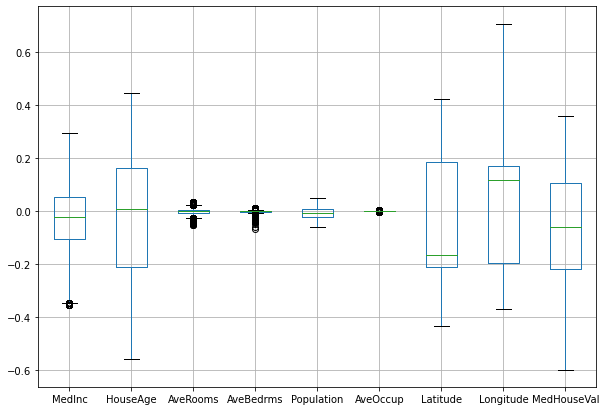

In [75]:
df_t.boxplot(figsize=(10,7))

In [76]:
df_tEsc=df.copy()
vars_rob=['MedInc','AveRooms','AveBedrms','AveOccup']
df_tEsc[vars_rob]=esc_rob.fit_transform(df[vars_rob])
df_tEsc.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.540799e-01,28.639486,0.124015,0.512533,1425.476744,0.296227,35.631861,-119.569704,2.068558
std,8.715378e-01,12.585558,1.535166,5.071439,1132.462122,12.182767,2.135952,2.003532,1.153956
min,-1.392252e+00,1.000000,-2.719533,-7.656179,3.000000,-2.493559,32.540000,-124.350000,0.149990
25%,-4.456270e-01,18.000000,-0.489191,-0.456959,787.000000,-0.455561,33.930000,-121.800000,1.196000
50%,1.018608e-16,29.000000,0.000000,0.000000,1166.000000,0.000000,34.260000,-118.490000,1.797000
75%,5.543730e-01,37.000000,0.510809,0.543041,1725.000000,0.544439,37.710000,-118.010000,2.647250
max,5.259674e+00,52.000000,84.806698,353.332681,35682.000000,1455.116059,41.950000,-114.310000,5.000010


In [77]:
vars_est=['HouseAge','Population','Latitude','Longitude','MedHouseVal']
df_tEsc[vars_est]=esc_est.fit_transform(df[vars_est])
df_tEsc.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,20640.000000,20640.000000,2.064000e+04,20640.000000,2.064000e+04,2.064000e+04,2.064000e+04
mean,1.540799e-01,8.557001e-16,0.124015,0.512533,-6.465442e-17,0.296227,1.256263e-15,-6.527810e-15,1.466140e-15
std,8.715378e-01,1.000024e+00,1.535166,5.071439,1.000024e+00,12.182767,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.392252e+00,-2.196180e+00,-2.719533,-7.656179,-1.256123e+00,-2.493559,-1.447568e+00,-2.385992e+00,-1.662641e+00
25%,-4.456270e-01,-8.453931e-01,-0.489191,-0.456959,-5.638089e-01,-0.455561,-7.967887e-01,-1.113209e+00,-7.561633e-01
50%,1.018608e-16,2.864572e-02,0.000000,0.000000,-2.291318e-01,0.000000,-6.422871e-01,5.389137e-01,-2.353337e-01
75%,5.543730e-01,6.643103e-01,0.510809,0.543041,2.644949e-01,0.544439,9.729566e-01,7.784964e-01,5.014973e-01
max,5.259674e+00,1.856182e+00,84.806698,353.332681,3.025033e+01,1455.116059,2.958068e+00,2.625280e+00,2.540411e+00


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X,x,Y,y=train_test_split(df_tEsc.drop(columns='MedHouseVal'),df_tEsc['MedHouseVal'])
lin=LinearRegression()
lin.fit(X,Y)

LinearRegression()

In [80]:
lin.score(X,Y),lin.score(x,y)

(0.6104735470806839, 0.5921498851469656)

In [81]:
import matplotlib.pyplot as plt

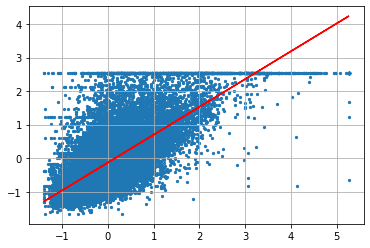

In [82]:
# Graficamos 'MedInc' (0), 'Population' (4) y 'Longitude' (7)
#
x=df_tEsc['MedInc']
plt.scatter(x,df_tEsc['MedHouseVal'],s=5)
plt.plot(x,lin.intercept_+lin.coef_[0]*x,'r')
plt.grid()

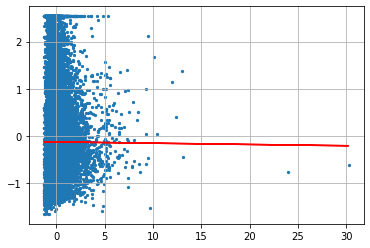

In [83]:
x=df_tEsc['Population']
plt.scatter(x,df_tEsc['MedHouseVal'],s=5)
plt.plot(x,lin.intercept_+lin.coef_[4]*x,'r')
plt.grid()

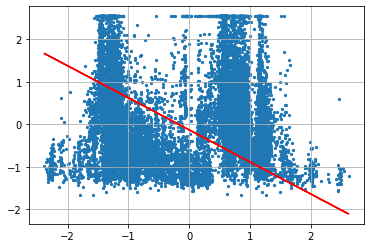

In [84]:
x=df_tEsc['Longitude']
plt.scatter(x,df_tEsc['MedHouseVal'],s=5)
plt.plot(x,lin.intercept_+lin.coef_[7]*x,'r')
plt.grid()

In [85]:
# Regresión con los datos sin transformar
X_ST,x,Y_ST,y=train_test_split(df.drop(columns='MedHouseVal'),df['MedHouseVal'])
lin_ST=LinearRegression()
lin_ST.fit(X_ST,Y_ST)
lin_ST.score(X_ST,Y_ST),lin_ST.score(x,y)

(0.6081909106793335, 0.5980873425452736)

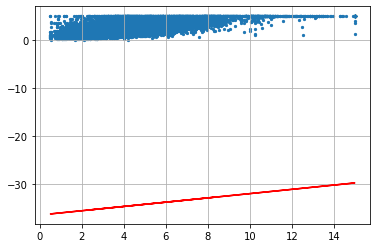

In [86]:
x=df['MedInc']
plt.scatter(x,df['MedHouseVal'],s=5)
plt.plot(x,lin_ST.intercept_+lin_ST.coef_[0]*x,'r')
plt.grid()

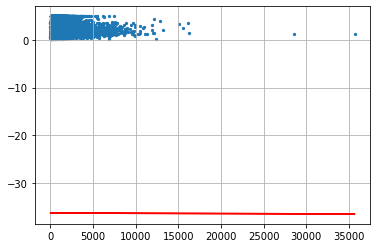

In [87]:
x=df['Population']
plt.scatter(x,df['MedHouseVal'],s=5)
plt.plot(x,lin_ST.intercept_+lin_ST.coef_[4]*x,'r')
plt.grid()

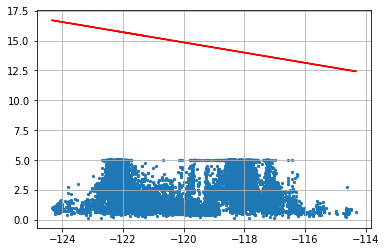

In [88]:
x=df['Longitude']
plt.scatter(x,df['MedHouseVal'],s=5)
plt.plot(x,lin_ST.intercept_+lin_ST.coef_[7]*x,'r')
plt.grid()

In [89]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010
